# CAMUS 2D - Results

In [138]:
# Imports
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2

## Plot function

In [139]:
def plots_with_transparency(title, ED, ED_p, ED_gt, ES, ES_p, ES_gt):
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 3, hspace=0.1, wspace=0.1)
    (ax1, ax2, ax3), (ax4, ax5, ax6) = gs.subplots(sharex='col', sharey='row')

    # END-DIASTOLIC
    ax1.imshow(ED[0], cmap='gray')
    ax1.axis('auto')
    ax1.set_ylabel("End Diastolic", fontsize=15)
    ax1.set_title("Original frame", fontsize=15)
    
    ax2.imshow(ED[0], cmap='gray')
    ax2.imshow(ED_p[0], alpha=(ED_p[0]>0)*0.1, cmap='tab10')
    ax2.axis('auto')
    ax2.set_title("Prediction", fontsize=15)
    
    ax3.imshow(ED[0], cmap='gray')
    ax3.imshow(ED_gt[0], alpha=(ED_gt[0]>0)*0.1, cmap='tab10')
    ax3.axis('auto')
    ax3.set_title("Ground truth", fontsize=15)

    # END-SYSTOLIC
    ax4.imshow(ES[0], cmap='gray')
    ax4.axis('auto')
    ax4.set_ylabel("End Systolic", fontsize=15)

    ax5.imshow(ES[0], cmap='gray')
    ax5.imshow(ES_p[0], alpha=(ES_p[0]>0)*0.1, cmap='tab10')
    ax5.axis('auto')
    
    ax6.imshow(ES[0], cmap='gray')
    ax6.imshow(ES_gt[0], alpha=(ES_gt[0]>0)*0.1, cmap='tab10')
    ax6.axis('auto')

    for ax in fig.get_axes():
        ax.label_outer()

# CAMUS 2D - Segmentation results

In [140]:
def show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros):
    ED_path = ('{}/patient{}{}/patient{}{}_{}_ED.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ED = io.imread(ED_path, plugin='simpleitk')

    ED_pred_path = ('{}/patient{}{}_{}_ED.nii'.format(prediction_folder, zeros, patient, view))
    ED_pred = io.imread(ED_pred_path, plugin='simpleitk')
    
    ED_gt_path = ('{}/patient{}{}_{}_ED.nii'.format(ground_truth_folder, zeros, patient, view))
    ED_gt = io.imread(ED_gt_path, plugin='simpleitk')

    ES_path = ('{}/patient{}{}/patient{}{}_{}_ES.mhd'.format(testing_folder, zeros, patient, zeros, patient, view))
    ES = io.imread(ES_path, plugin='simpleitk')

    ES_pred_path = ('{}/patient{}{}_{}_ES.nii'.format(prediction_folder, zeros, patient, view))
    ES_pred = io.imread(ES_pred_path, plugin='simpleitk')
    
    ES_gt_path = ('{}/patient{}{}_{}_ES.nii'.format(ground_truth_folder, zeros, patient, view))
    ES_gt = io.imread(ES_gt_path, plugin='simpleitk')
    
    plots_with_transparency('Patient{}{}_{}'.format(zeros, patient, view), ED, ED_pred, ED_gt, ES, ES_pred, ES_gt)

1. Enter patient number (1-50): 50
2. Choose view (2CH-4CH): 4CH
Loading Patient0050_4CH...


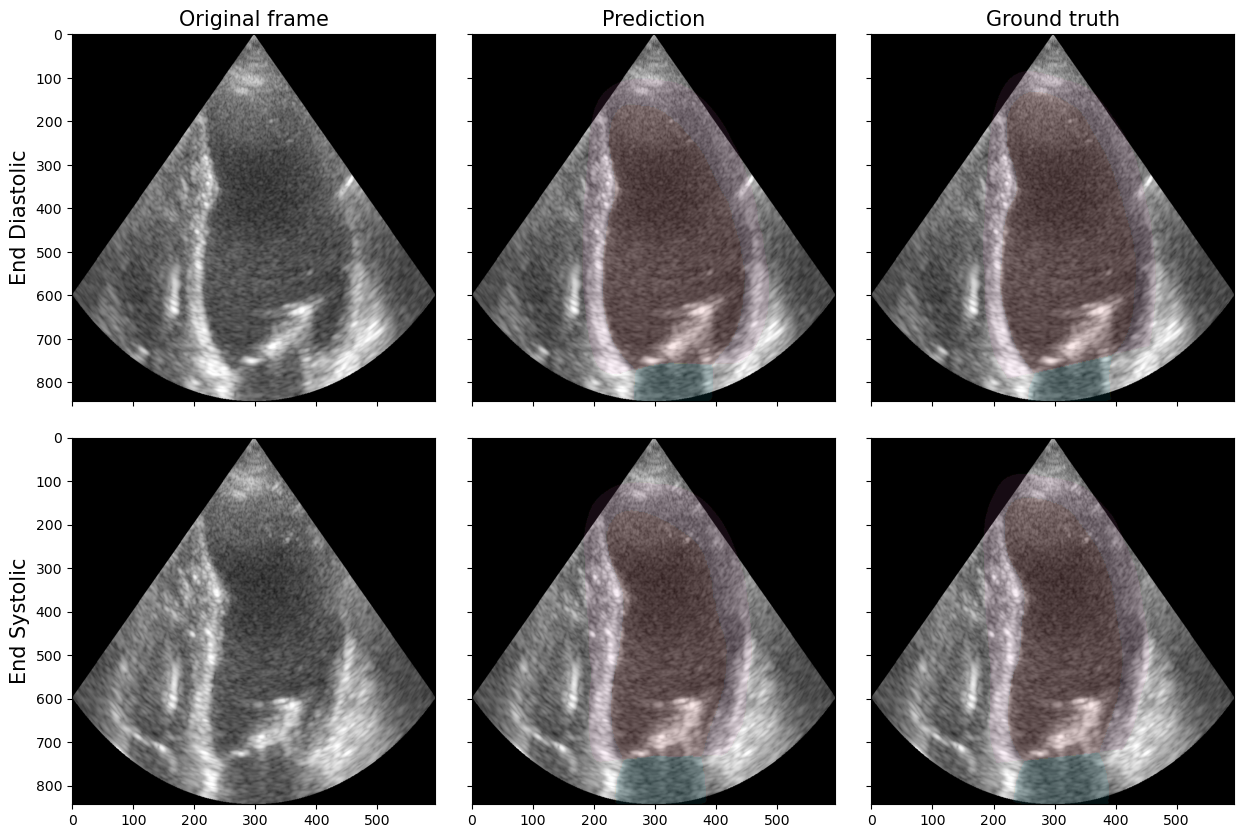

In [141]:
# Paths to testing and prediction folders
testing_folder = 'D:/TFG/Database/testing'
prediction_folder = 'D:/TFG/Results/Task250_2DLeftVentricle'
ground_truth_folder = 'D:/TFG/Results/groundtruth'

patient = input('1. Enter patient number (1-50): ')

if (len(patient)) == 1:
    view = input('2. Choose view (2CH-4CH): ')
    patient_full = 'patient000'.format(patient)
    zeros = '000'
    if view == '2CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
        
    elif view == '4CH':
        print('Loading Patient000{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)

    else:
        print('Wrong choice! Try again')

elif (len(patient)) == 2 and patient <= '50':
    view = input('2. Choose view (2CH-4CH): ')
    zeros = '00'
    if view == '2CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
    
    elif view == '4CH':
        print('Loading Patient00{}_{}...'.format(patient, view))
        show_images(testing_folder, prediction_folder, ground_truth_folder, patient, view, zeros)
        
    else:
        print('Wrong choice! Try again') 
else:
    print('Error! Insert a number between 1 and 50')

# CAMUS 2D - Evaluation metrics

In [142]:
f = open('D:/TFG/Results/summary.json')
data = json.load(f)

In [143]:
Bckg_dice = []
LVEpi_dice = []
LVEndo_dice = []
LA_dice = []

for i in range(0, len(data['results']['all'])):
    # Background
    Bckg_dice.append(data['results']['all'][i]['0']['Dice'])

    #Left ventricle
    LVEpi_dice.append(data['results']['all'][i]['1']['Dice'])
   
    # Wall
    LVEndo_dice.append(data['results']['all'][i]['2']['Dice'])
   
    # Left atrium
    LA_dice.append(data['results']['all'][i]['3']['Dice'])

dice_data = [Bckg_dice, LVEpi_dice, LVEndo_dice, LA_dice]

C:\Users\Oriol\AppData\Local\Temp\ipykernel_15168\3063548493.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Background', 'Left ventricle','Left ventricle wall', 'Left atrium'])


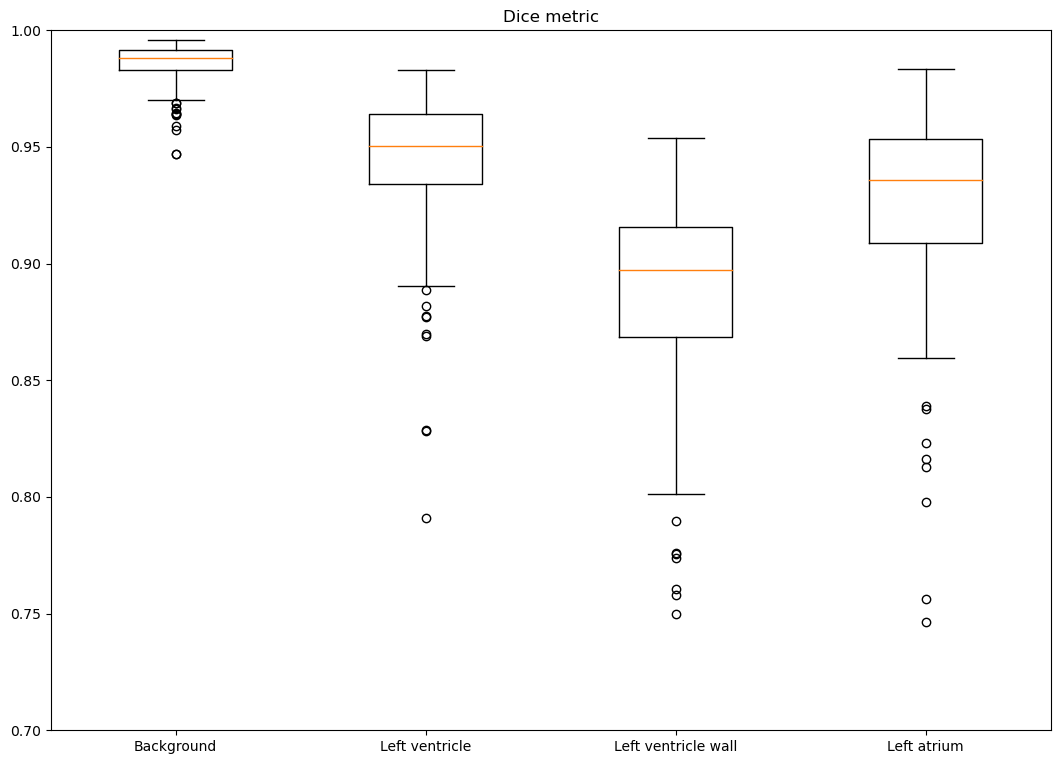

In [150]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Background', 'Left ventricle','Left ventricle wall', 'Left atrium'])
 
plt.title("Dice metric")
ax.boxplot(dice_data)
plt.ylim(0.7, 1)
plt.show()


In [11]:
ED_gt = io.imread('D:/TFG/Database/testing_gt/patient0050/patient0050_4CH_ED_gt.mhd', plugin='simpleitk')
ED_seg = io.imread('D:/TFG/Results/Task250_2DLeftVentricle/patient0050_4CH_ED.nii', plugin='simpleitk')

ES_gt = io.imread('D:/TFG/Database/testing_gt/patient0050/patient0050_4CH_ES_gt.mhd', plugin='simpleitk')
ES_seg = io.imread('D:/TFG/Results/Task250_2DLeftVentricle/patient0050_4CH_ES.nii', plugin='simpleitk')

(-0.5, 594.5, 842.5, -0.5)

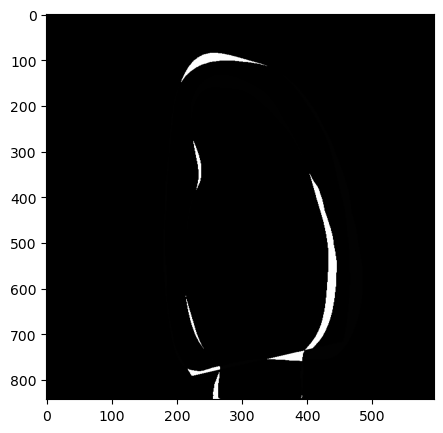

In [12]:
fig = plt.figure(figsize=(5, 5))

# END-DIASTOLIC
plt.imshow(ED_seg[0] - ED_gt[0], cmap='gray')
plt.axis('auto')

In [17]:
patient0001_4CH_ED = io.imread('D:/TFG/Database/testing/patient0001/patient0001_4CH_ED.mhd')
patient0001_4CH_ED_pred = io.imread('D:/TFG/Results/Task250_2DLeftVentricle/patient0001_4CH_ED.nii')
result = cv2.bitwise_and(patient0001_4CH_ED[0], patient0001_4CH_ED[0], mask=patient0001_4CH_ED_pred[0])
result_gt = cv2.bitwise_and(patient0001_4CH_ED[0], patient0001_4CH_ED[0], mask=patient0001_4CH_ED_pred[0])

(-0.5, 668.5, 1101.5, -0.5)

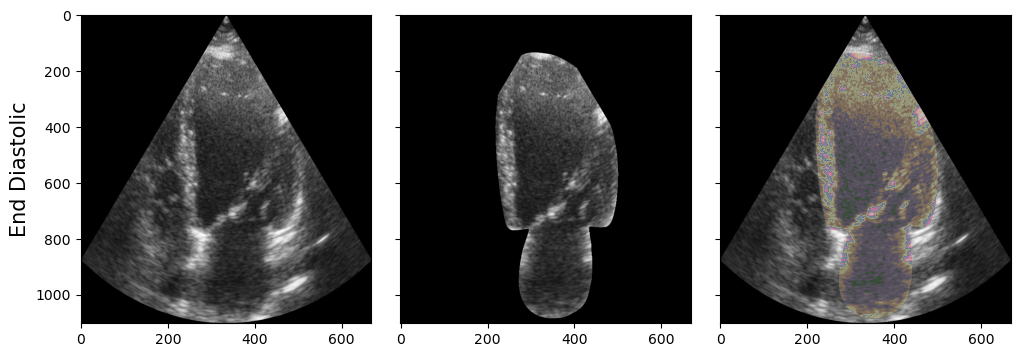

In [28]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, hspace=0.1, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')

# END-DIASTOLIC
ax1.imshow(patient0001_4CH_ED[0], cmap='gray')
ax1.axis('auto')
ax1.set_ylabel("End Diastolic", fontsize=15)

ax2.imshow(result, cmap='gray')
ax2.axis('auto')

ax3.imshow(patient0001_4CH_ED[0], cmap='gray')
ax3.imshow(result, alpha=(result>0)*0.3, cmap='Accent')
ax3.axis('auto')

# CAMUS 2D - Temporal aspect

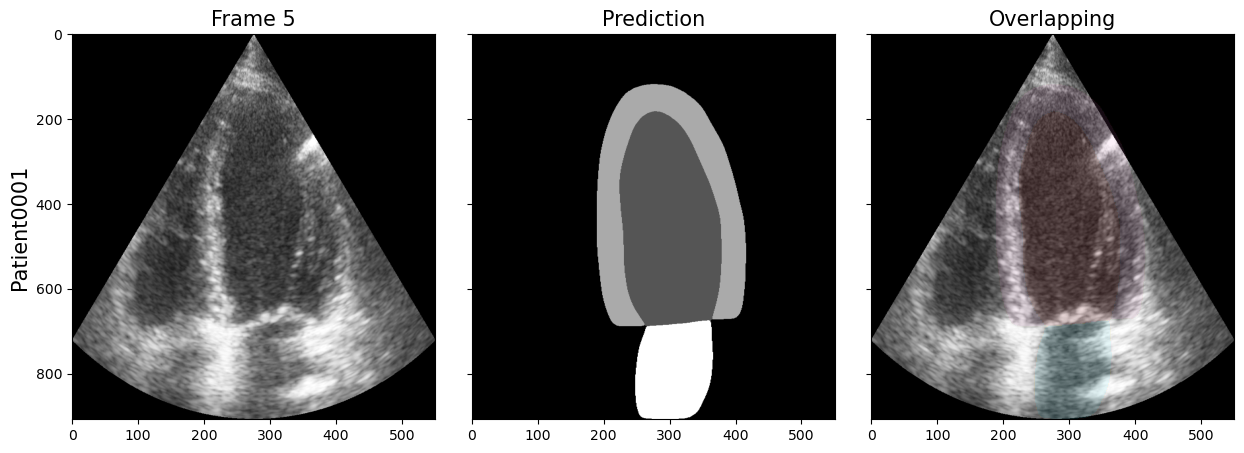

In [132]:
patient = '09'
path = 'D:/TFG/Results/Task300_2DTemporal/patient00{}_4CH.nii'.format(patient)
path2 = 'D:/TFG/Database/testing/patient00{}/patient00{}_4CH_sequence.mhd'.format(patient, patient)

seq_pred = io.imread(path, plugin='simpleitk')
seq = io.imread(path2, plugin='simpleitk')

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3, hspace=0.1, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')

i = 5
ax1.imshow(seq[i], cmap='gray')
ax1.axis('auto')
ax1.set_ylabel("Patient0001", fontsize=15)
ax1.set_title("Frame {}".format(i), fontsize=15)

ax2.imshow(seq_pred[i], cmap='gray')
ax2.axis('auto')
ax2.set_title("Prediction", fontsize=15)

ax3.imshow(seq[i], cmap='gray')
ax3.imshow(seq_pred[i], alpha=(seq_pred[i]>0)*0.1, cmap='tab10')
ax3.axis('auto')
ax3.set_title("Overlapping", fontsize=15)

for ax in fig.get_axes():
    ax.label_outer()

In [133]:
path_2 = 'D:/TFG/Results/Task300_2DTemporal/patient00{}_2CH.nii'.format(patient)
path_4 = 'D:/TFG/Results/Task300_2DTemporal/patient00{}_4CH.nii'.format(patient)

seq_pred2 = io.imread(path_2, plugin='simpleitk')
seq_pred4 = io.imread(path_4, plugin='simpleitk')

list_pixels_2CH = []
list_pixels_4CH = []

for i in range(0, seq_pred2.shape[0]):
    list_pixels_2CH.append(np.sum(seq_pred2[i] == 1)) # 1 correspond to the LV
    
for i in range(0, seq_pred4.shape[0]):
    list_pixels_4CH.append(np.sum(seq_pred4[i] == 1))

Text(0.5, 1.0, 'Left ventricle patient0009')

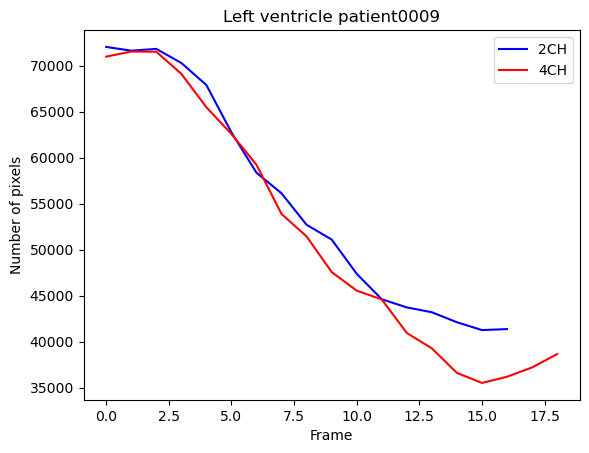

In [134]:
plt.plot(list_pixels_2CH, "-b", label = "2CH")
plt.plot(list_pixels_4CH, "-r", label = "4CH")
plt.legend(loc="upper right")

plt.xlabel("Frame")
plt.ylabel("Number of pixels")
plt.title("Left ventricle patient00{}".format(patient))

In [100]:

i = 3
print("Number of pixels for Background", np.sum(seq_pred[i] == 0))
print("Number of pixels for LV", np.sum(seq_pred[i] == 1))
print("Number of pixels for Wall", np.sum(seq_pred[i] == 2))
print("Number of pixels for LA", np.sum(seq_pred[i] == 3))
print("Total pixels", np.sum(seq_pred[i] == 0) + np.sum(seq_pred[i] == 1) + np.sum(seq_pred[i] == 2) + np.sum(seq_pred[i] == 3))

number_of_white_pix = np.sum(seq_pred[0] > 0)
print(number_of_white_pix)
print(seq_pred[0].shape[0] * seq_pred[0].shape[1])

Number of pixels for Background 321722
Number of pixels for LV 107196
Number of pixels for Wall 61075
Number of pixels for LA 11592
Total pixels 501585
182598
501585


# CAMUS 2D - Final results

In [103]:
# Visualization + validation metrics + volume (all together)